<a href="https://colab.research.google.com/github/Ndifreke000/Machine-Learning-Algorithms/blob/main/PCA_in_Crabs_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import of Libraries

In [ ]:
import pandas as pd
pd.set_option('display.precision',3)
import io
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import set_config
set_config(display='text')

import warnings

warnings.filterwarnings('ignore')



from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
uploaded = files.upload()

Saving 4 - crabs.csv to 4 - crabs.csv


In [ ]:
crabs_data = pd.read_csv("4 - crabs.csv")

crabs_data = crabs_data.rename(columns = {'sp':'species', 'FL':'Frontal Lobe', 'RW':'Rear Width', 'CL':'Carapace Midline', 'CW':'Maximum width', 'BD':'Body Depth'})
crabs_data['species'] = crabs_data['species'].map({'B':'Blue','O':'Orange'})
crabs_data['sex'] = crabs_data['sex'].map({'M':'Male', 'F':'Female'})

In [ ]:
crabs_data.describe(include="all")
crabs_data.head()

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum width,Body Depth
0,Blue,Male,1,8.1,6.7,16.1,19.0,7.0
1,Blue,Male,2,8.8,7.7,18.1,20.8,7.4
2,Blue,Male,3,9.2,7.8,19.0,22.4,7.7
3,Blue,Male,4,9.6,7.9,20.1,23.1,8.2
4,Blue,Male,5,9.8,8.0,20.3,23.0,8.2


In [ ]:
crabs_data['class'] = crabs_data.species + crabs_data.sex

crabs_data['class'].value_counts()

BlueMale        50
BlueFemale      50
OrangeMale      50
OrangeFemale    50
Name: class, dtype: int64

In [ ]:
data_columns = ['Frontal Lobe', 'Rear Width', 'Carapace Midline', 'Maximum width', 'Body Depth']
crabs_data[data_columns].describe()

,Frontal Lobe,Rear Width,Carapace Midline,Maximum width,Body Depth
count,200.000,200.000,200.000,200.000,200.000
mean,15.583,12.738,32.105,36.415,14.030
std,3.495,2.573,7.119,7.872,3.425
min,7.200,6.500,14.700,17.100,6.100
25%,12.900,11.000,27.275,31.500,11.400
50%,15.550,12.800,32.100,36.800,13.900
75%,18.050,14.300,37.225,42.000,16.600
max,23.100,20.200,47.600,54.600,21.600


Boxplot of the relevant features


<Axes: >

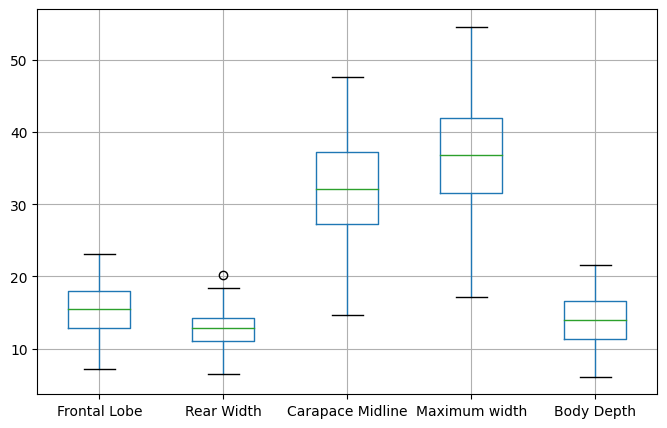

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
crabs_data[data_columns].boxplot()

### Visualization of Classes


<Axes: title={'center': 'Carapace Midline'}, xlabel='class'>

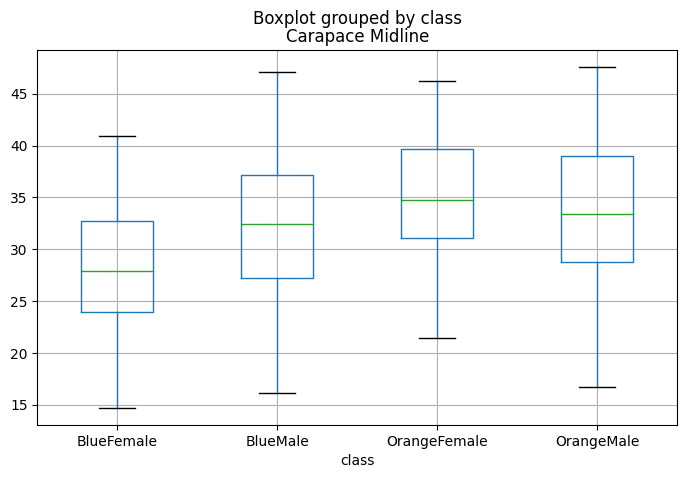

In [ ]:
crabs_data.boxplot(column='Carapace Midline', by = 'class', figsize=(8,5))

<Axes: title={'center': 'Body Depth'}, xlabel='class'>

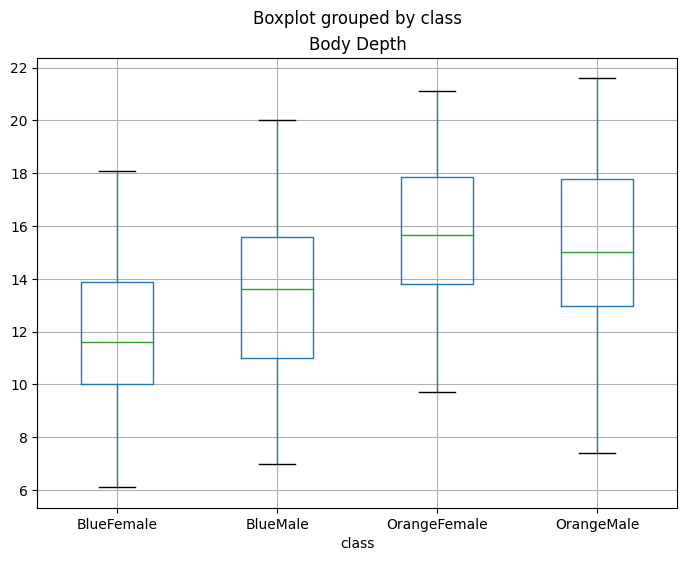

In [ ]:
crabs_data.boxplot(column='Body Depth', by = 'class', figsize=(8,6))

Histograms

array([[<Axes: title={'center': 'Frontal Lobe'}>,
        <Axes: title={'center': 'Rear Width'}>,
        <Axes: title={'center': 'Carapace Midline'}>,
        <Axes: title={'center': 'Maximum width'}>,
        <Axes: title={'center': 'Body Depth'}>]], dtype=object)

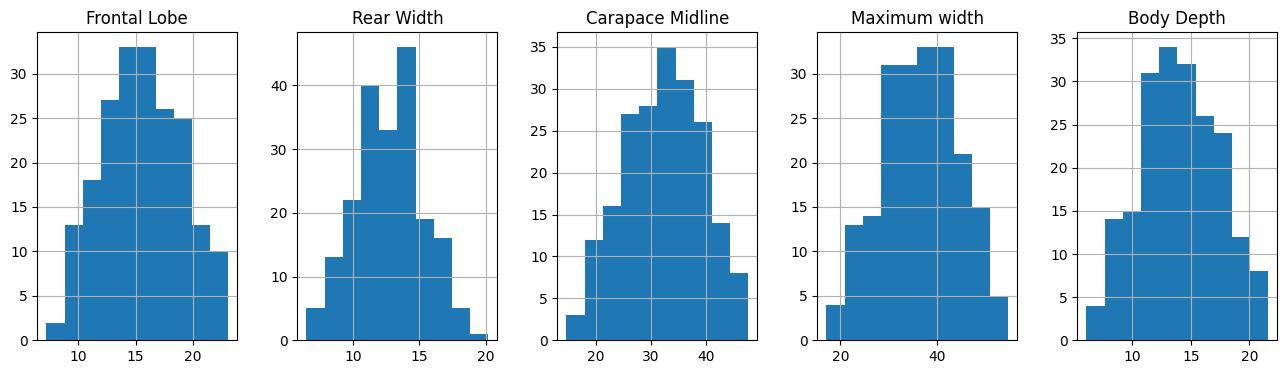

In [ ]:
crabs_data[data_columns].hist(figsize=(16,4),layout=(1,5))

<Axes: xlabel='Frontal Lobe', ylabel='Count'>

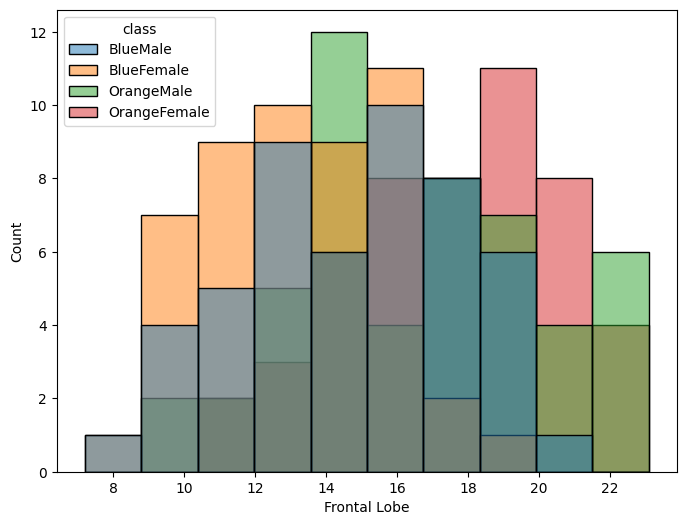

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(crabs_data,x='Frontal Lobe',hue='class',bins=10)

<Axes: xlabel='Rear Width', ylabel='Count'>

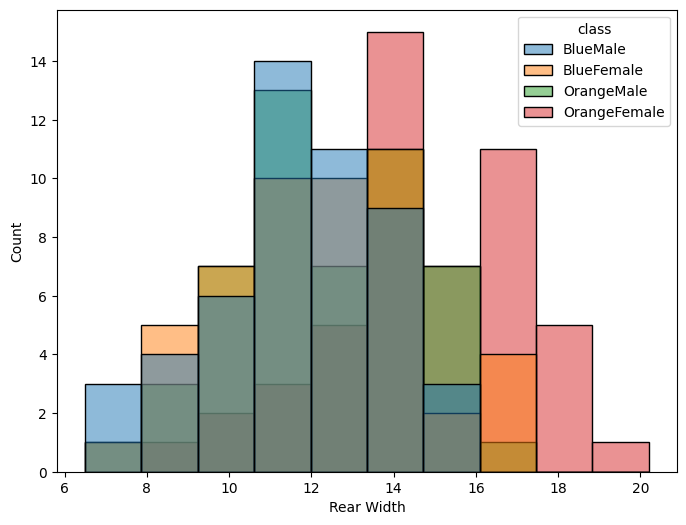

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(crabs_data,x='Rear Width',hue='class',bins=10)

<Axes: xlabel='Carapace Midline', ylabel='Count'>

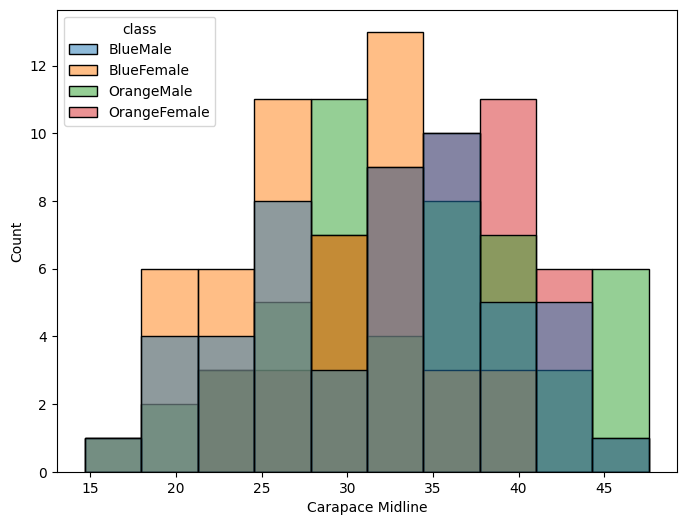

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(crabs_data,x='Carapace Midline',hue='class',bins=10)

<Axes: xlabel='Maximum width', ylabel='Count'>

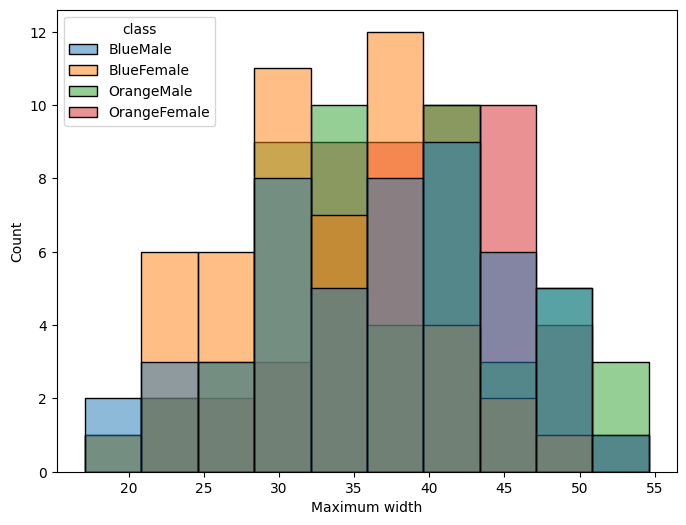

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(crabs_data,x='Maximum width',hue='class',bins=10)

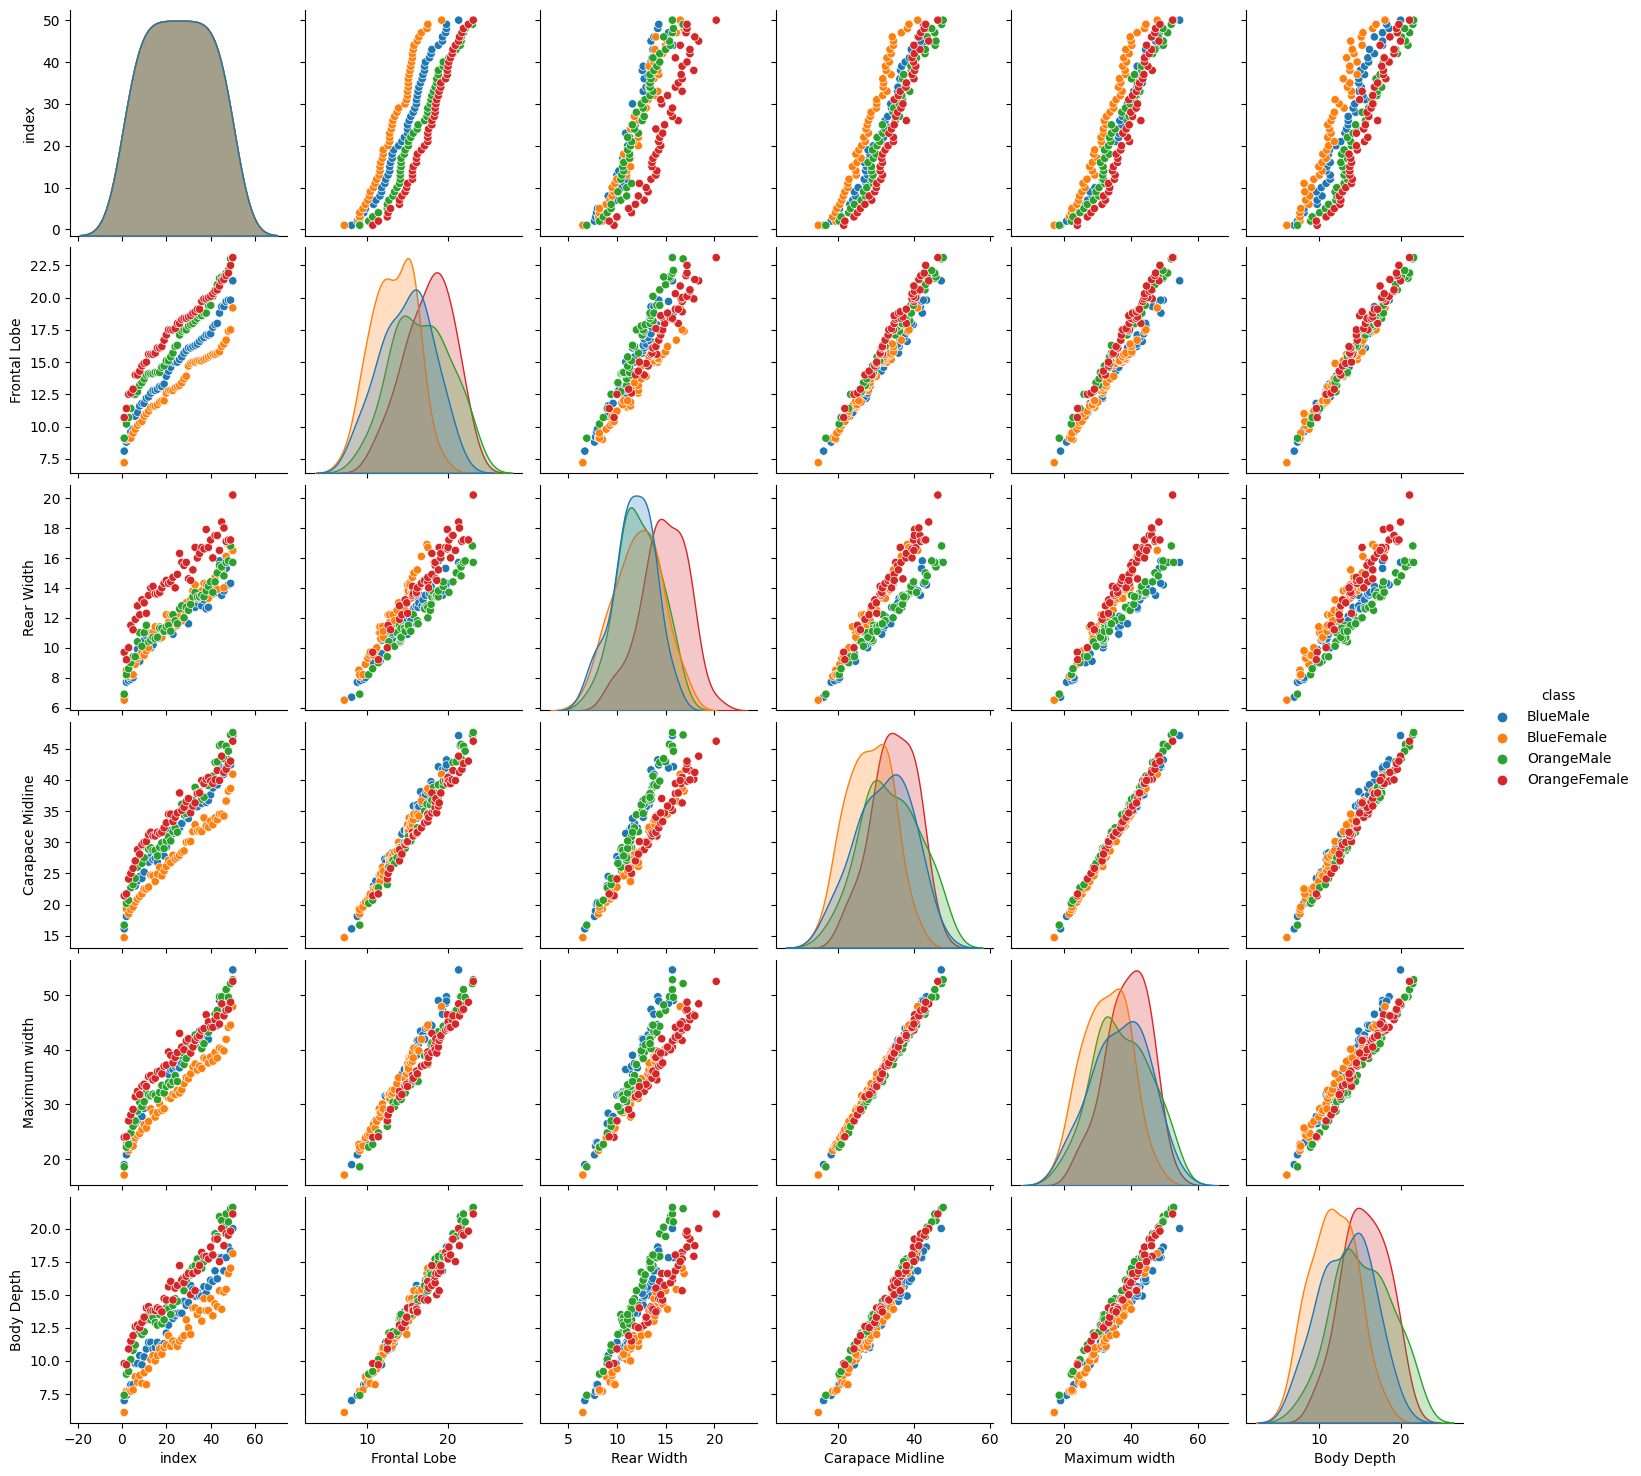

In [ ]:
sns.pairplot(crabs_data,hue='class')

PCA, Using IT


In [ ]:
crabs_standardized = crabs_data.copy()
crabs_standardized[data_columns] = StandardScaler().fit_transform(crabs_data[data_columns])
crabs_standardized.describe().T

,count,mean,std,min,25%,50%,75%,max
index,200.0,2.550e+01,14.467,1.000,13.000,2.550e+01,38.000,50.000
Frontal Lobe,200.0,-7.105e-17,1.003,-2.404,-0.770,-9.465e-03,0.708,2.156
Rear Width,200.0,6.040e-16,1.003,-2.430,-0.677,2.396e-02,0.608,2.907
Carapace Midline,200.0,1.066e-16,1.003,-2.451,-0.680,-7.745e-04,0.721,2.182
Maximum width,200.0,-4.974e-16,1.003,-2.460,-0.626,4.909e-02,0.711,2.316
Body Depth,200.0,0.000e+00,1.003,-2.321,-0.770,-3.820e-02,0.752,2.216


Application of PCA

In [ ]:
myPCA = PCA().fit(crabs_standardized[data_columns])
print(myPCA.explained_variance_ratio_)
print(myPCA.explained_variance_ratio_.cumsum())

[9.57766957e-01 3.03370413e-02 9.32659482e-03 2.22707143e-03
 3.42335531e-04]
[0.95776696 0.988104   0.99743059 0.99965766 1.        ]


### Screeplot

Used to determine the number of principal component to keep in a principal component analysis

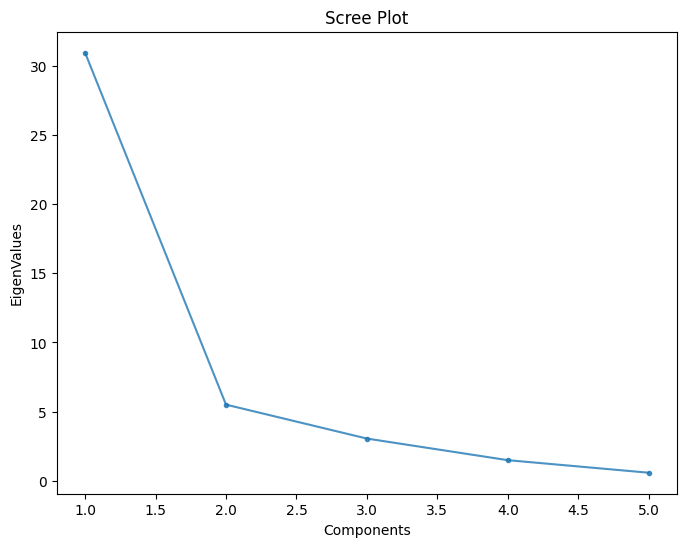

In [ ]:
fig = plt.figure(figsize=(8,6))

#Scree plot
plt.plot(range(1, len(myPCA.singular_values_) + 1), myPCA.singular_values_,alpha=0.8, marker='.')
plt.xlabel('Components')
plt.ylabel('EigenValues')
plt.title('Scree Plot')
plt.show()

% of Explained Variance by Component

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.plot(range(1, len(myPCA.explained_variance_ratio_) + 1), myPCA.explained_variance_ratio_, alpha=0.8, marker='.', label="Explained Variance")
plt.xlabel('Components')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.title('Percentage of variance explained by component')

NameError: ignored